In [65]:
# Import required libraries

# Reading Dataset
import pandas as pd

# Graphing
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10.0, 15.0]
plt.rcParams['figure.dpi'] = 150

# Calculations
import numpy as np
from random import sample

# Curve Fitting
from scipy.optimize import curve_fit

In [66]:
dataset = pd.read_csv("GDP_dataset.csv")

In [67]:
# Preferences

# Independent Variables
ind_names = dataset.keys()[2:]

# Dependent Variable
dep_name = dataset.keys()[1]

# Timeline
T = [int(y) for y in dataset["Year"]]

# Initial Regression coefficients
coeff = np.zeros(len(ind_names))

# Regression Curve
def regression(X, C = coeff):
    """
    Regression curve
    """
    return np.array(C) * np.array(X)

In [68]:
sample_indices = sorted(sample(range(len(T)), int(0.7 * len(T))))
sample_T = [T[x] for x in sample_indices]

In [101]:
Mean = [sum(dataset[i][sample_indices]) / len(dataset[i][sample_indices]) for i in ind_names]
corelation = dataset.corr()["GDP"][2:]

In [115]:
def plot_all():
    """
    Plot graph of independent variables
    """

    # How many subplots do we need?
    subs = len(ind_names) // 2
    if 2 * subs < len(ind_names):
        subs += 1

    plt.suptitle("Independent variables")
    for i in range(len(ind_names)):
        plt.subplot(subs, 2, i + 1)
        plt.scatter(sample_T, dataset[ind_names[i]][sample_indices], color='y', label=ind_names[i])
        plt.legend(loc=0)
    return

def plot_rel():
    """
    Plot graph of independent variables vs dependent variables
    """

    # How many subplots do we need?
    subs = len(ind_names) // 2
    if 2 * subs < len(ind_names):
        subs += 1

    plt.suptitle("Spearman corelation")
    for i in range(len(ind_names)):
        plt.subplot(subs, 2, i + 1)
        plt.title("r = {:.2f}".format(corelation[i]))
        sns.relplot(x=1, y=0, data=dataset[[dep_name, ind_names[i]]], kind="line")
#         plt.scatter(dataset[ind_names[i]][sample_indices], dataset[dep_name][sample_indices], color='y', label=ind_names[i])
        plt.legend(loc=0)
    return

In [ ]:
plot_all()

ValueError: If using all scalar values, you must pass an index

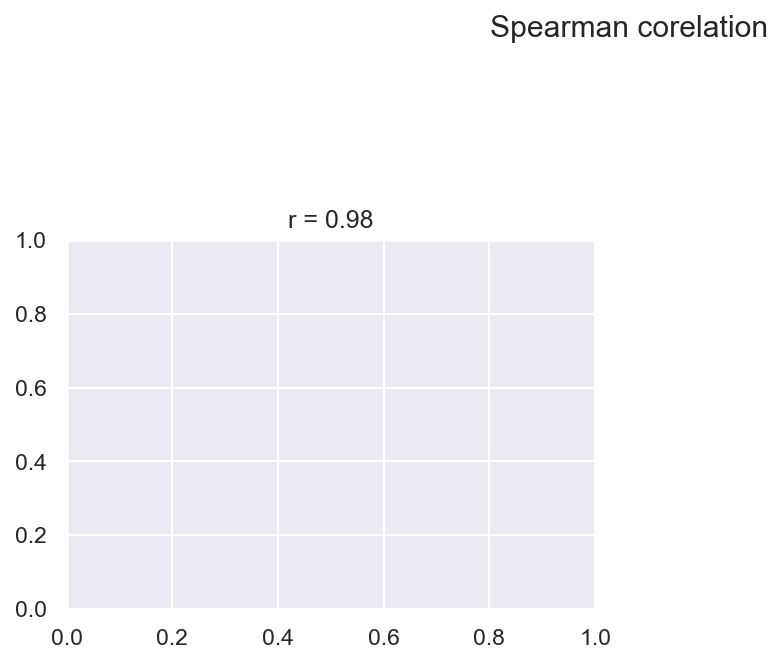

In [116]:
plot_rel()